In [17]:
from policies import MultiRobotNavigation
from history import History
import torch

In [2]:
h = [History({
    "ol": torch.randn(24),
    "ov": torch.randn(2), 
    "og": torch.randn(2),
    "od": torch.randn(1)
    }) for _ in range(10)]

In [18]:
m = MultiRobotNavigation(History({
    "ol": torch.randn(24),
    "ov": torch.randn(2), 
    "og": torch.randn(2),
    "od": torch.randn(1)
    }))

In [19]:
m.forward(h)

AttributeError: 'int' object has no attribute 'get'

 $$\log \pi_\theta(a_t | s_t)$$

In [1]:
from __future__ import annotations
import numpy as np
import pygame as pg 
from robots import CarLikeBot, CircleRobot
from random import uniform
from env import Environment
from policies.policies import MultiRobotNavigation
from algo.ppo import sample_trajectories
from rewards import RewardCircle
import torch

env = Environment(CircleRobot, 3, reward=RewardCircle())
h, w = env.shape
env.get_observation()

p = MultiRobotNavigation(env.agents[0].history)

T =256


# print(actions)
# print(rewards)
sample_trajectories(env, p, 256)

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


([[<history.History at 0x1615a9a50>],
 tensor([[[1.0000e+00, 2.2341e-04]],
 
         [[1.0000e+00, 1.7547e-04]],
 
         [[1.0000e+00, 2.3532e-04]],
 
         [[1.0000e+00, 2.0503e-04]],
 
         [[1.0000e+00, 7.4619e-04]],
 
         [[1.0000e+00, 1.1751e-03]],
 
         [[1.0000e+00, 1.7012e-03]],
 
         [[1.0000e+00, 8.3848e-04]],
 
         [[1.0000e+00, 6.1669e-05]],
 
         [[1.0000e+00, 1.9766e-05]],
 
         [[1.0000e+00, 4.6477e-05]],
 
         [[1.0000e+00, 6.0582e-04]],
 
         [[1.0000e+00, 5.7227e-05]],
 
         [[1.0000e+00, 1.6891e-04]],
 
         [[1.0000e+00, 8.3065e-05]],
 
         [[1.0000e+00, 1.2606e-04]],
 
         [[1.0000e+00, 1.7464e-04]],
 
         [[1.0000e+00, 2.2684e-04]],
 
         [[1.0000e+00, 3.7465e-04]],
 
         [[1.0000e+00, 1.1956e-04]],
 
         [[1.0000e+00, 1.8531e-04]],
 
         [[1.0000e+00, 9.8581e-05]],
 
         [[1.0000e+00, 9.8104e-05]],
 
         [[1.0000e+00, 3.4297e-05]],
 
         [[1.0000e+00, 2.2

In [5]:
import tensorflow as tf
import numpy as np
import gym

In [24]:


# Environment setup
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# Hyperparameters
gamma = 0.99  # Discount factor
lr_actor = 0.001  # Actor learning rate
lr_critic = 0.001  # Critic learning rate
clip_ratio = 0.2  # PPO clip ratio
epochs = 10  # Number of optimization epochs
batch_size = 64  # Batch size for optimization

# Actor and Critic networks
class ActorCritic(tf.keras.Model):
    def __init__(self, state_size, action_size):
        super(ActorCritic, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.policy_logits = tf.keras.layers.Dense(action_size)
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.value = tf.keras.layers.Dense(1)

    def call(self, state):
        x = self.dense1(state)
        logits = self.policy_logits(x)
        value = self.value(x)
        return logits, value

# PPO algorithm
def ppo_loss(old_logits, old_values, advantages, states, actions, returns):
    print("states.hsape",states.shape)
    def compute_loss(logits, values, actions, returns):
        actions_onehot = tf.one_hot(actions, action_size, dtype=tf.float32)
        policy = tf.nn.softmax(logits)
        action_probs = tf.reduce_sum(actions_onehot * policy, axis=1)
        old_policy = tf.nn.softmax(old_logits)
        old_action_probs = tf.reduce_sum(actions_onehot * old_policy, axis=1)

        # Policy loss
        ratio = tf.exp(tf.math.log(action_probs + 1e-10) - tf.math.log(old_action_probs + 1e-10))
        clipped_ratio = tf.clip_by_value(ratio, 1 - clip_ratio, 1 + clip_ratio)
        policy_loss = -tf.reduce_mean(tf.minimum(ratio * advantages, clipped_ratio * advantages))

        # Value loss
        value_loss = tf.reduce_mean(tf.square(values - returns))

        # Entropy bonus (optional)
        entropy_bonus = tf.reduce_mean(policy * tf.math.log(policy + 1e-10))

        total_loss = policy_loss + 0.5 * value_loss - 0.01 * entropy_bonus  # Entropy regularization
        return total_loss

    def get_advantages(returns, values):
        advantages = returns - values
        return (advantages - tf.reduce_mean(advantages)) / (tf.math.reduce_std(advantages) + 1e-8)

    def train_step(states, actions, returns, old_logits, old_values):
        with tf.GradientTape() as tape:
            logits, values = model(states)
            loss = compute_loss(logits, values, actions, returns)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        return loss

    advantages = get_advantages(returns, old_values)
    for _ in range(epochs):
        loss = train_step(states, actions, returns, old_logits, old_values)
    return loss


# Initialize actor-critic model and optimizer
model = ActorCritic(state_size, action_size)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_actor)

# Main training loop
max_episodes = 1000
max_steps_per_episode = 512
for episode in range(max_episodes):
    states, actions, rewards, values, returns = [], [], [], [], []
    state = env.reset()[0]
    for step in range(max_steps_per_episode):
        # print(state)
        state = tf.expand_dims(tf.convert_to_tensor(state, dtype=tf.float32), 0)
        logits, value = model(state)

        # Sample action from the policy distribution
        # print("logits",logits)
        action = tf.random.categorical(logits, 1)[0, 0].numpy()
        # print("action", action)
        # print(len(env.step(action)))
        # print(env.step(action))
        next_state, reward, done, _, _ = env.step(action)

        states.append(state)
        actions.append(action)
        rewards.append(reward)
        values.append(value)

        state = next_state

        if done:
            returns_batch = []
            discounted_sum = 0
            for r in rewards[::-1]:
                discounted_sum = r + gamma * discounted_sum
                returns_batch.append(discounted_sum)
            returns_batch.reverse()

            states = tf.concat(states, axis=0)
            actions = np.array(actions, dtype=np.int32)
            values = tf.concat(values, axis=0)
            returns_batch = tf.convert_to_tensor(returns_batch)
            old_logits, _ = model(states)

            loss = ppo_loss(old_logits, values, returns_batch - np.array(values), states, actions, returns_batch)
            # print(f"Episode: {episode + 1}, Loss: {loss.numpy()}")

            break

import matplotlib.pyplot as plt

plt.plot([i for i in range(len(l))], l)

/Users/kajratbekbolinov/anaconda3/lib/python3.11/site-packages/keras/src/layers/layer.py:357: UserWarning: `build()` was called on layer 'actor_critic_17', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/Users/kajratbekbolinov/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


states.hsape (18, 4)
states.hsape (23, 4)
states.hsape (16, 4)
states.hsape (18, 4)
states.hsape (13, 4)
states.hsape (13, 4)
states.hsape (18, 4)
states.hsape (21, 4)
states.hsape (10, 4)
states.hsape (23, 4)
states.hsape (40, 4)
states.hsape (22, 4)
states.hsape (33, 4)
states.hsape (52, 4)
states.hsape (46, 4)
states.hsape (55, 4)
states.hsape (14, 4)
states.hsape (30, 4)
states.hsape (94, 4)
states.hsape (65, 4)
states.hsape (78, 4)
states.hsape (29, 4)
states.hsape (66, 4)
states.hsape (62, 4)
states.hsape (62, 4)
states.hsape (66, 4)
states.hsape (127, 4)
states.hsape (72, 4)
states.hsape (104, 4)
states.hsape (55, 4)
states.hsape (52, 4)


KeyboardInterrupt: 

In [4]:
from policies.policies import P1_pt
import numpy as np



In [2]:
p = P1_pt()

In [16]:
s = np.random.rand(84, 32)


In [17]:
p.forward(s)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x32 and 4x16)

In [1]:
from policies.policies import P1_pt
import torch

In [2]:
p = P1_pt()

In [3]:
ol = torch.randn(6, 64)
od = torch.randn(6, 4)
og = torch.randn(6, 8)
ov = torch.randn(6, 8)
ip = torch.randn(6, 84)

In [4]:
p.value(ol, od, og, ov)

RuntimeError: Given groups=1, weight of size [16, 1, 5], expected input[1, 6, 64] to have 1 channels, but got 6 channels instead

In [25]:
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        # Convolutional layers for ol (laser scanner input)
        self.conv_layers_ol = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=16, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1),
            nn.ReLU()
        )

        # Fully connected layers for od, og, ov
        self.fc_od = nn.Sequential(
            nn.Linear(in_features=4, out_features=16),
            nn.ReLU()
        )
        self.fc_og = nn.Sequential(
            nn.Linear(in_features=8, out_features=32),
            nn.ReLU()
        )
        self.fc_ov = nn.Sequential(
            nn.Linear(in_features=8, out_features=32),
            nn.ReLU()
        )

        # Fully connected layer to merge all inputs
        self.fc_merge = nn.Sequential(
            nn.Linear(in_features=1936, out_features=384),
            nn.ReLU()
        )

        # Final output layer for velocity
        self.fc_velocity = nn.Linear(in_features=384, out_features=4)

    def forward(self, ol, od, og, ov):
        # Forward pass for ol
        ol = self.conv_layers_ol(ol)
        ol = torch.flatten(ol, start_dim=1)

        # Forward pass for od, og, ov
        od = self.fc_od(od)
        og = self.fc_og(og)
        ov = self.fc_ov(ov)

        # Concatenate all the fully connected layers
        merged = torch.cat((ol, od, og, ov), dim=1)

        # Apply the final fully connected layer
        merged = self.fc_merge(merged)

        # Output layer for velocity
        velocity = self.fc_velocity(merged)

        return velocity

# Initialize the neural network
model = NeuralNetwork()

In [1]:
from policies.policies import P1_pt
import torch
model = P1_pt()

In [2]:
ol = torch.randn(512, 1, 64)  # Example input for laser scanner (1 sample, 1 channel, 10 features)
od = torch.randn(512, 4)       # Example input for od (1 sample, 4 features)
og = torch.randn(512, 8)       # Example input for og (1 sample, 4 features)
ov = torch.randn(512, 8)  

In [3]:
output = model.forward(ol, od, og, ov)
output

tensor([[-0.0817, -0.0604,  0.0264,  0.1756],
        [-0.0932, -0.0929,  0.0796,  0.1389],
        [-0.0336, -0.0652,  0.0401,  0.1685],
        ...,
        [-0.0655, -0.0098,  0.0815,  0.1175],
        [-0.0324, -0.0354,  0.1070,  0.1550],
        [-0.0444, -0.0591,  0.0107,  0.1592]], grad_fn=<AddmmBackward0>)

In [4]:
output = model.determine_actions(ol, od, og, ov)
output

tensor([[-0.0817, -0.0604],
        [-0.0932, -0.0929],
        [-0.0336, -0.0652],
        ...,
        [-0.0655, -0.0098],
        [-0.0324, -0.0354],
        [-0.0444, -0.0591]], grad_fn=<SplitBackward0>)

In [5]:
actions = model.sample_actions(ol, od, og, ov)
actions

tensor([[-1.0818, -0.2637],
        [ 1.2565, -1.5281],
        [-0.3413, -0.2549],
        ...,
        [-0.9628, -0.1468],
        [-0.6445, -0.1651],
        [-0.0418, -1.1836]])

In [7]:
actions.sum(dim=1, keepdim=True)

tensor([[-1.3455e+00],
        [-2.7155e-01],
        [-5.9624e-01],
        [-2.0472e+00],
        [-1.2440e+00],
        [ 3.1462e-02],
        [-2.2797e+00],
        [ 1.0753e+00],
        [ 6.1478e-03],
        [ 8.9549e-01],
        [ 1.9419e-01],
        [ 1.3053e+00],
        [-4.5702e-01],
        [-9.6064e-01],
        [ 6.4749e-02],
        [ 1.5630e-01],
        [-1.9893e+00],
        [-8.7359e-02],
        [ 7.4465e-01],
        [-1.6855e+00],
        [-1.1030e+00],
        [ 1.1970e+00],
        [-2.0567e+00],
        [ 5.8582e-02],
        [ 1.4214e+00],
        [-2.1386e+00],
        [ 1.4878e+00],
        [-9.2372e-01],
        [-1.7371e+00],
        [ 1.9388e+00],
        [-1.2547e-01],
        [-1.1128e+00],
        [ 1.1699e+00],
        [-9.3360e-01],
        [ 8.3775e-01],
        [ 4.3926e-02],
        [ 9.3839e-01],
        [-8.1413e-01],
        [-1.2960e-01],
        [-5.1779e-01],
        [ 6.7339e-01],
        [ 5.6401e-01],
        [ 1.3361e+00],
        [ 2

In [28]:
params = model.forward(ol, od, og, ov)  # map states to distribution parameters
mu, sigma = torch.chunk(params, 2, -1)

In [31]:
mu.shape

torch.Size([512, 2])

In [32]:
sigma.shape

torch.Size([512, 2])

In [6]:
model.log_prob(actions, ol, od, og, ov)

tensor([[-0.8151, -0.5643],
        [-2.0868, -2.2856],
        [-0.6342, -0.8949],
        ...,
        [-0.8599, -0.7298],
        [-0.8989, -0.5394],
        [-2.2717, -0.4689]], grad_fn=<SubBackward0>)

In [1]:
from env import Environment
from robots import CarLikeBot, CircleRobot
import numpy as np
import torch 
from policies.policies import P1_pt
from rewards import RewardCircle
import matplotlib.pyplot as plt

p = P1_pt()
env = Environment(CircleRobot, 3, reward=RewardCircle())



pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [8]:
def sample_trajectories(env, pi, max_steps):    
    ol = np.zeros((max_steps + 1, 1, 64), dtype=float)
    od = np.zeros((max_steps + 1, 4), dtype=float)
    og = np.zeros((max_steps + 1, 8), dtype=float)
    ov = np.zeros((max_steps + 1, 8), dtype=float)  # states from s(0) to s(T+1)
    actions = np.zeros((max_steps, 2), dtype=float)  # actions from a(0) to a(T)
    rewards = np.zeros((max_steps), dtype=float)  # rewards from r(0) to r(T)
    env.reset()
    ol[0], od[0], og[0], ov[0] = env.get_observation()
    for t in range(max_steps):
        
        a = pi.sample_actions(torch.tensor(np.reshape(ol[t], (1, 1, 64))).float(),
                              torch.tensor(np.reshape(od[t], (1, 4))).float(),
                              torch.tensor(np.reshape(og[t], (1, 8))).float(),
                              torch.tensor(np.reshape(ov[t], (1, 8))).float())

        ol_next, od_next, og_next, ov_next, r, done = env.step(np.array(a))  # env needs numpy array of (Nx1)

        ol[t + 1] = ol_next
        od[t + 1] = od_next
        og[t + 1] = og_next
        ov[t + 1] = ov_next
        actions[t] = a
        rewards[t] = r[0]
        
    ol = torch.tensor(ol).float()
    od = torch.tensor(od).float()
    og = torch.tensor(og).float()
    ov = torch.tensor(ov).float()   # (T+1, N, state_dim)  care for the extra timestep at the end!
    tensor_a = torch.tensor(actions).float()  # (T, N, 1)
    tensor_r = torch.tensor(rewards).float()  # (T, N)
    
    return ol, od, og, ov, tensor_a, tensor_r

def discount_cum_sum(rewards, gamma):
    T = rewards.shape[0]
    returns = torch.zeros_like(rewards)
    for t in range(T):
        # Compute the discounted sum of future rewards from time step t
        returns[t] = torch.sum(rewards[t:] * (gamma ** torch.arange(T - t)))
    return returns

def compute_gae(tensor_r, values, gamma, lambda_):
    delta_t = tensor_r + gamma * values[1:] - values[:-1]
    advantages = discount_cum_sum(delta_t, gamma * lambda_)
    value_targets = advantages + values[:-1]
    return value_targets, advantages

def value_loss(values, value_targets):
    value_loss = torch.tensor(0.)
    T = values.shape[0]
    value_loss += (1/T)*torch.sum((values - value_targets) ** 2)
    return value_loss

def ppo_loss(p_ratios, advantage_estimates, epsilon):
    policy_loss = torch.tensor(0.) 
    T = p_ratios.shape[0]
    
    p_ratios = p_ratios.sum(dim=1)
    clipped_ratios = torch.clamp(p_ratios, 1.0 - epsilon, 1.0 + epsilon)

    surrogate_loss = torch.min(p_ratios * advantage_estimates, clipped_ratios * advantage_estimates)
    policy_loss -= (1/T)*torch.sum(surrogate_loss)
    return policy_loss
    
def plot_training(rewards, p_losses, v_losses=None):
    num_plots = 2 if v_losses is None else 3

    plt.subplot(num_plots, 1, 1)
    plt.plot(rewards, label='mean rewards', color='green')
    plt.ylabel('Mean reward')
    plt.subplot(num_plots, 1, 2)
    plt.plot(p_losses, label='policy loss', color='red')
    plt.ylabel('Policy loss')
    if v_losses is not None:
        plt.subplot(num_plots, 1, 3)
        plt.plot(v_losses, label='value loss', color='blue')
        plt.ylabel('Value loss')
    plt.xlabel('Epoch')
    plt.show()

In [10]:
max_steps = 100
epochs = 5000
lr = 0.0003
gamma=0.95
epsilon = 0.2

sgd_iters = 10

pi = P1_pt()
pi.load_state_dict(torch.load('model.pth'))
train_env = Environment(CarLikeBot, 3, reward=RewardCircle())
optim = torch.optim.Adam(pi.parameters(), lr=lr)

mean_rewards, p_losses, v_losses = np.zeros(epochs), np.zeros(epochs), np.zeros(epochs)

for epoch in range(epochs):
    ol, od, og, ov, tensor_a, tensor_r = sample_trajectories(train_env, pi, max_steps)

    with torch.no_grad():
        logp_old = pi.log_prob(tensor_a, ol[:max_steps], od[:max_steps], og[:max_steps], ov[:max_steps])

    for i in range(sgd_iters):
        values = pi.value_estimates(ol, od, og, ov)
        logp = pi.log_prob(tensor_a, ol[:max_steps], od[:max_steps], og[:max_steps], ov[:max_steps])

        with torch.no_grad():
            print(tensor_r.shape, values.shape)
            value_targets, advantage_estimates = compute_gae(tensor_r, values, gamma, lambda_=0.97)
            advantage_estimates = (advantage_estimates - advantage_estimates.mean()) / advantage_estimates.std()
                
        L_v = value_loss(values[:max_steps], value_targets)
        
        p_ratios = torch.exp(logp - logp_old)
    
        L_ppo = ppo_loss(p_ratios, advantage_estimates, epsilon=epsilon)
        total_loss = L_v + L_ppo
            
        optim.zero_grad()
        total_loss.backward()
        optim.step()
        
    if epoch % 100 == 0:
        print('Epoch %d, mean reward: %.3f, value loss: %.3f' % (epoch, tensor_r.mean(), L_v.item()))
    mean_rewards[epoch] = tensor_r.mean()
    v_losses[epoch] = L_v.item()
    p_losses[epoch] = L_ppo.item()
    # raise
        
# train_env.close()

plot_training(mean_rewards, p_losses, v_losses)
    
    

torch.Size([100]) torch.Size([101])
torch.Size([100]) torch.Size([101])
torch.Size([100]) torch.Size([101])
torch.Size([100]) torch.Size([101])
torch.Size([100]) torch.Size([101])
torch.Size([100]) torch.Size([101])
torch.Size([100]) torch.Size([101])
torch.Size([100]) torch.Size([101])
torch.Size([100]) torch.Size([101])
torch.Size([100]) torch.Size([101])
Epoch 0, mean reward: -0.174, value loss: 3993.669
torch.Size([100]) torch.Size([101])


KeyboardInterrupt: 

In [1]:
from env import Environment
from robots import CarLikeBot, CircleRobot
import numpy as np
import torch 
from policies.policies import P1_pt
from rewards import RewardCircle
import matplotlib.pyplot as plt

p = P1_pt()
env = Environment(CarLikeBot, 3, reward=RewardCircle())

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def sample_trajectories(env, pi, max_steps):    
    ol = np.zeros((max_steps + 1, 1, 64), dtype=float)
    od = np.zeros((max_steps + 1, 4), dtype=float)
    og = np.zeros((max_steps + 1, 8), dtype=float)
    ov = np.zeros((max_steps + 1, 8), dtype=float)  # states from s(0) to s(T+1)
    actions = np.zeros((max_steps, 2), dtype=float)  # actions from a(0) to a(T)
    rewards = np.zeros((max_steps), dtype=float)  # rewards from r(0) to r(T)
    env.reset()
    ol[0], od[0], og[0], ov[0] = env.get_observation()
    steps = max_steps
    for t in range(max_steps):
        
        a = pi.sample_actions(torch.tensor(np.reshape(ol[t], (1, 1, 64))).float(),
                              torch.tensor(np.reshape(od[t], (1, 4))).float(),
                              torch.tensor(np.reshape(og[t], (1, 8))).float(),
                              torch.tensor(np.reshape(ov[t], (1, 8))).float())

        ol_next, od_next, og_next, ov_next, r, done = env.step(np.array(a))  # env needs numpy array of (Nx1)

        ol[t + 1] = ol_next
        od[t + 1] = od_next
        og[t + 1] = og_next
        ov[t + 1] = ov_next
        actions[t] = a
        rewards[t] = r[0]
        if done:
            steps = t+1
            break
        
    ol = torch.tensor(ol).float()
    od = torch.tensor(od).float()
    og = torch.tensor(og).float()
    ov = torch.tensor(ov).float()
    tensor_a = torch.tensor(actions).float()
    tensor_r = torch.tensor(rewards).float()
    
    return ol, od, og, ov, tensor_a, tensor_r, steps

def discount_cum_sum(rewards, gamma):
    T = rewards.shape[0]
    returns = torch.zeros_like(rewards)
    for t in range(T):
        # Compute the discounted sum of future rewards from time step t
        returns[t] = torch.sum(rewards[t:] * (gamma ** torch.arange(T - t)))
    return returns

def compute_gae(tensor_r, values, gamma, lambda_):
    delta_t = tensor_r + gamma * values[1:] - values[:-1]
    advantages = discount_cum_sum(delta_t, gamma * lambda_)
    value_targets = advantages + values[:-1]
    return value_targets, advantages

def value_loss(values, value_targets):
    value_loss = torch.tensor(0.)
    T = values.shape[0]
    value_loss += (1/T)*torch.sum((values - value_targets) ** 2)
    return value_loss

def ppo_loss(p_ratios, advantage_estimates, epsilon):
    policy_loss = torch.tensor(0.) 
    T = p_ratios.shape[0]
    
    p_ratios = p_ratios.sum(dim=1)
    clipped_ratios = torch.clamp(p_ratios, 1.0 - epsilon, 1.0 + epsilon)

    surrogate_loss = torch.min(p_ratios * advantage_estimates, clipped_ratios * advantage_estimates)
    policy_loss -= (1/T)*torch.sum(surrogate_loss)
    return policy_loss
    
def plot_training(rewards, p_losses, v_losses=None):
    num_plots = 2 if v_losses is None else 3

    plt.subplot(num_plots, 1, 1)
    plt.plot(rewards, label='mean rewards', color='green')
    plt.ylabel('Mean reward')
    plt.subplot(num_plots, 1, 2)
    plt.plot(p_losses, label='policy loss', color='red')
    plt.ylabel('Policy loss')
    if v_losses is not None:
        plt.subplot(num_plots, 1, 3)
        plt.plot(v_losses, label='value loss', color='blue')
        plt.ylabel('Value loss')
    plt.xlabel('Epoch')
    plt.show()  

In [3]:
max_steps = 512
epochs = 5000
lr = 0.0003
gamma=0.95
epsilon = 0.2

sgd_iters = 10

pi = P1_pt()
# pi.load_state_dict(torch.load('model1.pth'))
train_env = Environment(CarLikeBot, 3, reward=RewardCircle())
optim = torch.optim.Adam(pi.parameters(), lr=lr)

mean_rewards, p_losses, v_losses = np.zeros(epochs), np.zeros(epochs), np.zeros(epochs)

for epoch in range(epochs):
    ol, od, og, ov, tensor_a, tensor_r, steps = sample_trajectories(train_env, pi, max_steps)
    # print(steps)
    with torch.no_grad():
        logp_old = pi.log_prob(tensor_a[:steps], ol[:steps], od[:steps], og[:steps], ov[:steps])

    for i in range(sgd_iters):
        values = pi.value_estimates(ol, od, og, ov)
        logp = pi.log_prob(tensor_a[:steps], ol[:steps], od[:steps], og[:steps], ov[:steps])
        # print(steps)
        with torch.no_grad():
            # print(tensor_r.shape, values.shape)
            value_targets, advantage_estimates = compute_gae(tensor_r[:steps], values[:steps+1], gamma, lambda_=0.97)
            advantage_estimates = (advantage_estimates - advantage_estimates.mean()) / advantage_estimates.std()
                
        L_v = value_loss(values[:steps], value_targets)
        
        p_ratios = torch.exp(logp - logp_old)
    
        L_ppo = ppo_loss(p_ratios, advantage_estimates, epsilon=epsilon)
        total_loss = L_v + L_ppo
            
        optim.zero_grad()
        total_loss.backward()
        optim.step()
        
    if epoch % 100 == 0:
        print('Epoch %d, steps: %d mean reward: %.3f, value loss: %.3f' % (epoch, steps, tensor_r.mean(), L_v.item()))
    mean_rewards[epoch] = tensor_r.mean()
    v_losses[epoch] = L_v.item()
    p_losses[epoch] = L_ppo.item()
    # raise
        
# train_env.close()

plot_training(mean_rewards, p_losses, v_losses)
    
    

Epoch 0, steps: 512 mean reward: 9.064, value loss: 47037.664
Epoch 100, steps: 68 mean reward: 1.480, value loss: 10523.592
Epoch 200, steps: 235 mean reward: 3.351, value loss: 2787.813
Epoch 300, steps: 123 mean reward: 2.137, value loss: 1469.827
Epoch 400, steps: 512 mean reward: 32.818, value loss: 112029.602


/Users/kajratbekbolinov/Desktop/mutlti_robots/env.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 500, steps: 189 mean reward: 6.728, value loss: 13611.232
Epoch 600, steps: 512 mean reward: 21.647, value loss: 52434.195
Epoch 700, steps: 512 mean reward: 19.157, value loss: 47634.867
Epoch 800, steps: 512 mean reward: 14.742, value loss: 45601.363
Epoch 900, steps: 512 mean reward: 13.446, value loss: 39240.434


KeyboardInterrupt: 

In [4]:
torch.save(pi.state_dict(), 'model_with_one_tanh.pth')

In [24]:
from __future__ import annotations
import numpy as np
import pygame as pg 
from robots import CarLikeBot, CircleRobot
from random import uniform
from env import Environment
from policies import ContiniousPolicy, DiscterePolicy
from rewards import RewardCircle
import time
import torch


In [25]:
from __future__ import annotations
import numpy as np
from robots import CarLikeBot, CircleRobot
from random import uniform
from env import Environment
from policies import ContiniousPolicy, DiscterePolicy
from algo.ppo import PPO
from rewards import RewardCircle
import matplotlib.pyplot as plt
import torch
torch.autograd.set_detect_anomaly(True)


def sample_trajectories(env, pi, max_steps, i_map):    
    ol = [[] for _ in range(len(env.agents))]
    od = [[] for _ in range(len(env.agents))]
    og = [[] for _ in range(len(env.agents))]
    ov = [[] for _ in range(len(env.agents))]
    actions = [[] for _ in range(len(env.agents))]  # actions from a(0) to a(T)
    rewards = [[] for _ in range(len(env.agents))]  # rewards from r(0) to r(T)
    env.reset(i_map)
    env.get_observation()
    
    for index, ag in enumerate(env.agents):
        if not ag.collision_w and not ag.collision_a and  not ag.reached:
                ol_, od_, og_, ov_ = ag.history.get_vectors()
                ol[index].append(ol_)
                od[index].append(od_)
                og[index].append(og_)
                ov[index].append(ov_)
#     print(len(od), len(od[0]), len(od[1]), len(actions), len(actions[0]), len(actions[1]))
    indexes = []
    for _ in range(max_steps):
        # print(len(od), len(od[0]), len(od[1]), len(actions), len(actions[0]), len(actions[1]))
        for index, ag in enumerate(env.agents):
                if not ag.collision_w and not ag.collision_a and  not ag.reached:
                        ol_, od_, og_, ov_ = ag.history.get_vectors()
                        act_ = pi.sample_actions(
                                torch.tensor(np.reshape(ol_, (1, 1, 64))).float(),
                                torch.tensor(np.reshape(od_, (1, 4))).float(),
                                torch.tensor(np.reshape(og_, (1, 8))).float(),
                                torch.tensor(np.reshape(ov_, (1, 8))).float()
                                )
                        actions[index].append(act_)
        
        for index, ag in enumerate(env.agents):
                if not ag.collision_w and not ag.collision_a and not ag.reached:
                        ol_, od_, og_, ov_ = ag.history.get_vectors()
                        ol[index].append(ol_)
                        od[index].append(od_)
                        og[index].append(og_)
                        ov[index].append(ov_)
                        
        rew, done = env.step(np.array([a[-1] for a in actions]))
        
        for index, ag in enumerate(env.agents):
                if index not in indexes:
                        if ag.collision_w or ag.collision_a or ag.reached:
                                indexes.append(index)
                        rewards[index].append(rew[index])
                        
        if done:
                break

    for i in range(len(env.agents)):
        ol[i] = torch.tensor(ol[i]).float()
        od[i] = torch.tensor(od[i]).float()
        og[i] = torch.tensor(og[i]).float()
        ov[i] = torch.tensor(ov[i]).float()
        actions[i] = torch.tensor(actions[i]).float()
        rewards[i] = torch.tensor(rewards[i]).float()
    
    return ol, od, og, ov, actions, rewards

def discount_cum_sum(rewards, gamma):
    T = rewards.shape[0]
    returns = torch.zeros_like(rewards)
    for t in range(T):
        # Compute the discounted sum of future rewards from time step t
        returns[t] = torch.sum(rewards[t:] * (gamma ** torch.arange(T - t)))
    return returns

def compute_gae(tensor_r, values, gamma, lambda_):
    delta_t = tensor_r + gamma * values[1:] - values[:-1]
    advantages = discount_cum_sum(delta_t, gamma * lambda_)
    value_targets = advantages + values[:-1]
    return value_targets, advantages

def value_loss(values, value_targets):
    value_loss = torch.tensor(0.)
    T = values.shape[0]
    value_loss += (1/T)*torch.sum((values - value_targets) ** 2)
    return value_loss

def ppo_loss(p_ratios, advantage_estimates, epsilon):
    policy_loss = torch.tensor(0.) 
    T = p_ratios.shape[0]
    
    p_ratios = p_ratios.sum(dim=1)
    clipped_ratios = torch.clamp(p_ratios, 1.0 - epsilon, 1.0 + epsilon)

    surrogate_loss = torch.min(p_ratios * advantage_estimates, clipped_ratios * advantage_estimates)
    policy_loss -= (1/T)*torch.sum(surrogate_loss)
    return policy_loss
    
def plot_training(rewards, p_losses, v_losses=None):
    num_plots = 2 if v_losses is None else 3

    plt.subplot(num_plots, 1, 1)
    plt.plot(rewards, label='mean rewards', color='green')
    plt.ylabel('Mean reward')
    plt.subplot(num_plots, 1, 2)
    plt.plot(p_losses, label='policy loss', color='red')
    plt.ylabel('Policy loss')
    if v_losses is not None:
        plt.subplot(num_plots, 1, 3)
        plt.plot(v_losses, label='value loss', color='blue')
        plt.ylabel('Value loss')
    plt.xlabel('Epoch')
    plt.show()

def compute_advanteges(rewards, values):
        advantages = rewards - values
        return advantages


def PPO(
        train_env,
        pi,
        path: str | None = None,
        max_steps = 512,
        epochs = 5000,
        lr = 0.0003,
        gamma=0.95,
        epsilon = 0.2,
        sgd_iters = 10,
        maps = [4, 5, 6]
        ):

        if path:
                pi.load_state_dict(torch.load(path))
        optim = torch.optim.Adam(pi.parameters(), lr=lr)

        for epoch in range(epochs):
                ol, od, og, ov, actions, rewards = sample_trajectories(train_env, pi, max_steps, int(np.random.choice(maps)))
                num_ag = len(ol)
                with torch.no_grad():
                        logp_old = []
                        for i in range(num_ag):
                                logp_old.append(pi.log_prob(
                                        actions[i][:actions[i].shape[0]],
                                        ol[i][:actions[i].shape[0]],
                                        od[i][:actions[i].shape[0]],
                                        og[i][:actions[i].shape[0]],
                                        ov[i][:actions[i].shape[0]]
                                        ))

                for _ in range(sgd_iters):
                        values = []
                        for i in range(num_ag):
                                values.append(pi.value_estimates(
                                        ol[i][:actions[i].shape[0]+1],
                                        od[i][:actions[i].shape[0]+1],
                                        og[i][:actions[i].shape[0]+1],
                                        ov[i][:actions[i].shape[0]+1]
                                ))

                        logp = []
                        for i in range(num_ag):
                                logp.append(pi.log_prob(
                                        actions[i][:actions[i].shape[0]],
                                        ol[i][:actions[i].shape[0]],
                                        od[i][:actions[i].shape[0]],
                                        og[i][:actions[i].shape[0]],
                                        ov[i][:actions[i].shape[0]]
                                ))

                        with torch.no_grad():
                                value_targets, advantage_estimates = [], []
                                for i in range(num_ag):
                                        value_t, advantage_e = compute_gae(
                                                rewards[i][:actions[i].shape[0]],
                                                values[i][:actions[i].shape[0]+1],
                                                gamma, lambda_=0.97)
                                        advantage_e = (advantage_e - advantage_e.mean()) / advantage_e.std()
                                        value_targets.append(value_t)
                                        advantage_estimates.append(advantage_e)
                        
                        for i in range(num_ag):        
                                L_v = value_loss(values[i][:actions[i].shape[0]], value_targets[i])
                                
                                p_ratios = torch.exp(logp[i] - logp_old[i])
                        
                                L_ppo = ppo_loss(p_ratios, advantage_estimates[i], epsilon=epsilon)
                                total_loss = L_v + L_ppo
                                
                                optim.zero_grad()
                                total_loss.backward()
                                optim.step()
                        
                if epoch % 100 == 0:
                        print('Epoch %d' % (epoch))


In [26]:
disc = True
maps_ = [4, 5, 6, 7]

env = Environment(CarLikeBot, int(np.random.choice(maps_)), reward=RewardCircle(), discrete=disc)
if disc:
    p = DiscterePolicy()
else: 
    p = ContiniousPolicy()
    p.load_state_dict(torch.load('pretrained_models/model_with_one_tanh.pth'))

In [27]:
PPO(
    env,
    p,
    path = None,
    max_steps = 256,
    epochs = 5000,
    lr = 0.0003,
    gamma=0.95,
    epsilon = 0.2,
    sgd_iters = 10,
    maps = [4, 5, 6]
    )

/Users/kajratbekbolinov/anaconda3/lib/python3.11/site-packages/torch/autograd/__init__.py:266: UserWarning: Error detected in AddmmBackward0. Traceback of forward call that caused the error:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/kajratbekbolinov/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/kajratbekbolinov/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/Users/kajratbekbolinov/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/Users/kajratbekbolinov/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
    self.asyncio_loop.run_forever()
  File "/Users/kajratbekbolinov/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
    s

RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor [264, 10]], which is output 0 of AsStridedBackward0, is at version 2; expected version 1 instead. Hint: the backtrace further above shows the operation that failed to compute its gradient. The variable in question was changed in there or anywhere later. Good luck!

In [10]:
ol, od, og, ov, actions, rewards = sample_trajectories(env, p, 40, 6)

2 1 1 2 0 0
2 1 1 2 0 0
2 2 2 2 1 1
2 3 3 2 2 2
2 4 4 2 3 3
2 5 5 2 4 4
2 6 6 2 5 5
2 7 7 2 6 6
2 8 8 2 7 7
2 9 9 2 8 8
2 10 10 2 9 9
2 11 11 2 10 10
2 12 12 2 11 11
2 13 13 2 12 12
2 14 14 2 13 13
2 15 15 2 14 14
2 16 16 2 15 15
2 17 17 2 16 16
2 18 18 2 17 17
2 19 19 2 18 18
2 20 20 2 19 19
2 21 21 2 20 20
2 22 22 2 21 21
2 23 23 2 22 22
2 24 24 2 23 23
2 25 25 2 24 24
2 25 26 2 24 25
2 25 27 2 24 26
2 25 28 2 24 27
2 25 29 2 24 28
2 25 30 2 24 29


In [11]:
len(ol), ol[0].shape, ol[1].shape

(2, torch.Size([25, 1, 64]), torch.Size([30, 1, 64]))

In [12]:
len(od), od[0].shape, od[1].shape

(2, torch.Size([25, 4]), torch.Size([30, 4]))

In [13]:
len(og), og[0].shape, og[1].shape

(2, torch.Size([25, 8]), torch.Size([30, 8]))

In [14]:
len(actions), actions[0].shape, actions[1].shape

(2, torch.Size([24, 2]), torch.Size([29, 2]))

In [15]:
len(rewards), rewards[0].shape, rewards[1].shape

(2, torch.Size([24]), torch.Size([29]))

In [17]:
rewards[0][-1], rewards[1][-1]

(tensor(-0.7500), tensor(-0.7500))

In [18]:
actions[0].shape

torch.Size([24, 2])

In [19]:
actions[0].shape[0]

24

In [28]:
import matplotlib.pyplot as plt

In [29]:
l = [0.0008, 0.0006, 0.0006, 0.0012, 0.0011, 0.0007, 0.0007, 0.0006, 0.0006, 0.0013, 0.0007, 0.0008, 0.0010, 0.0013, 0.0015, 0.0013, 0.0011, 0.0013, 0.0009, 0.0006, 0.0011]

Text(0.5, 1.0, 'using 5 steps per episode')

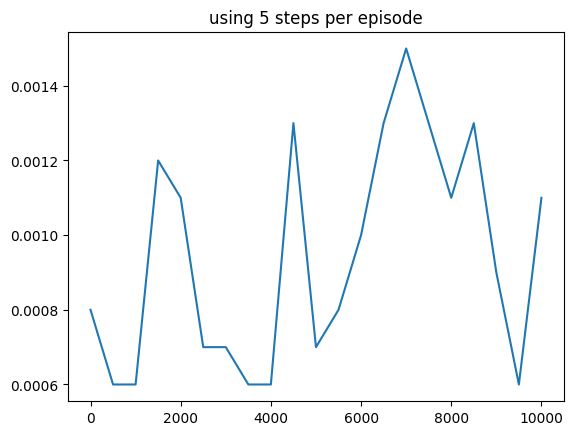

In [31]:
plt.plot([i*500 for i in range(len(l))], l)
plt.title('using 5 steps per episode')

In [42]:
l = [0.0008, 0.0012, 0.0010, 0.0015, 0.0014, 0.0011, 0.0015, 0.0010, 0.0009]

Text(0.5, 1.0, 'using 100 steps per episode')

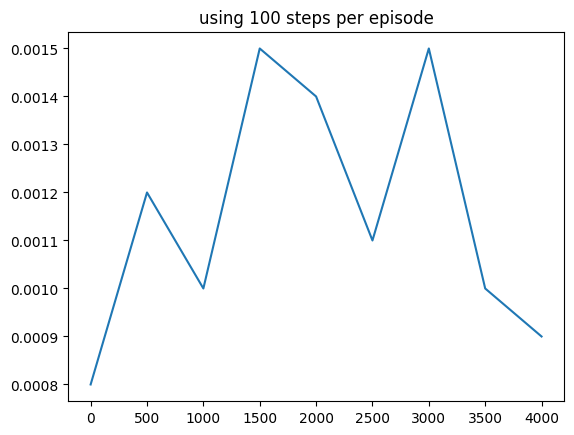

In [43]:
plt.plot([i*500 for i in range(len(l))], l)
plt.title('using 100 steps per episode')

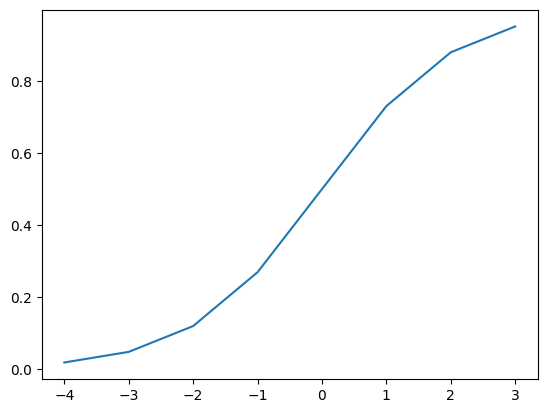

In [67]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
l = [i for i in range(-4, 4)]
y = [sigmoid(x) for x in l]
plt.plot(l, y)

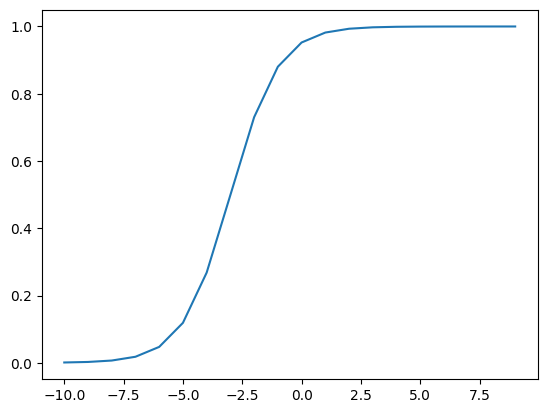

In [50]:
if 1.9 in range(10):
    print("yes")